# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [38]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      # WRITE YOUR CODE HERE
      #generate ages
      gen_ages <- runif(sample_size,age_lo,age_hi)
      #generate noise
      gen_eps_x <- rnorm(sample_size,0,sd_x)
      gen_eps_c <- rnorm(sample_size,0,sd_c)
      #linear combination of generated values to get x
      gen_x <- beta_xa*gen_ages + beta_x0 + gen_eps_x
      #then to get c
      gen_c <- beta_ca*gen_ages + beta_cx*gen_x + beta_c0 + gen_eps_c

      hold_object<-data.frame(age = gen_ages, x = gen_x, c = gen_c)

      return(hold_object)

}

set.seed(1)
dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,111.8610,70.83581,350.2622
2,124.6549,26.72611,188.3247
3,148.7424,86.42719,361.2397
4,188.9849,33.02431,181.2651
5,104.2018,118.75210,323.1836
6,187.8068,187.92338,632.6242


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [39]:
# WRITE YOUR CODE HERE
library(tidyverse)

a) Plot the relationship between age and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


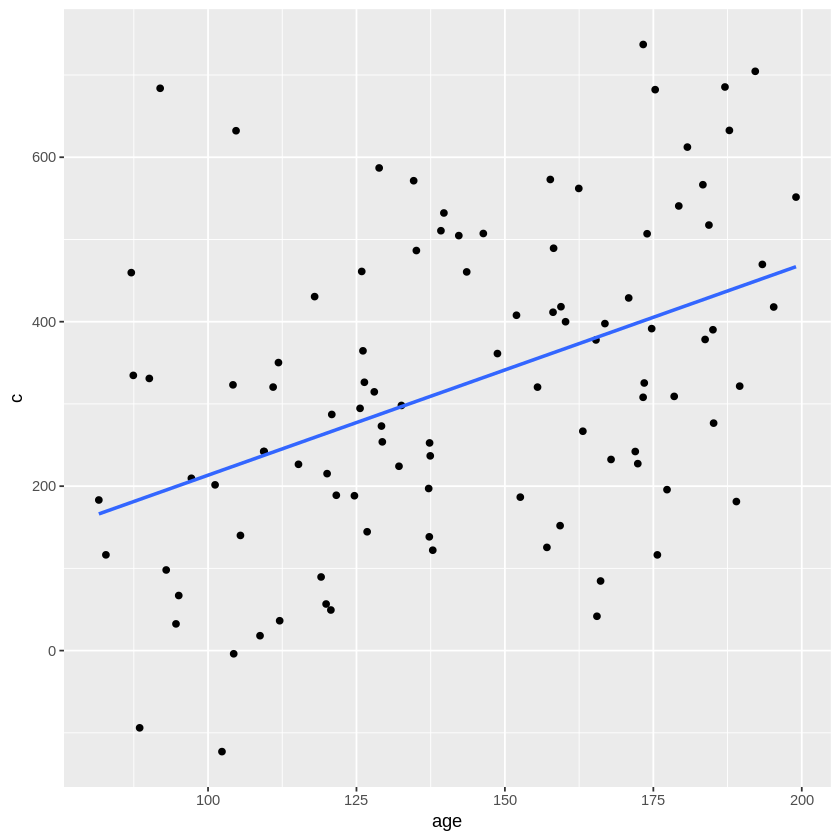

In [40]:
# WRITE YOUR CODE HERE
ggplot(dat,aes(x=age,y=c)) + geom_point() + geom_smooth(method="lm",se=FALSE)

b) Plot the relationship between reading experience, age, and reading comprehension.

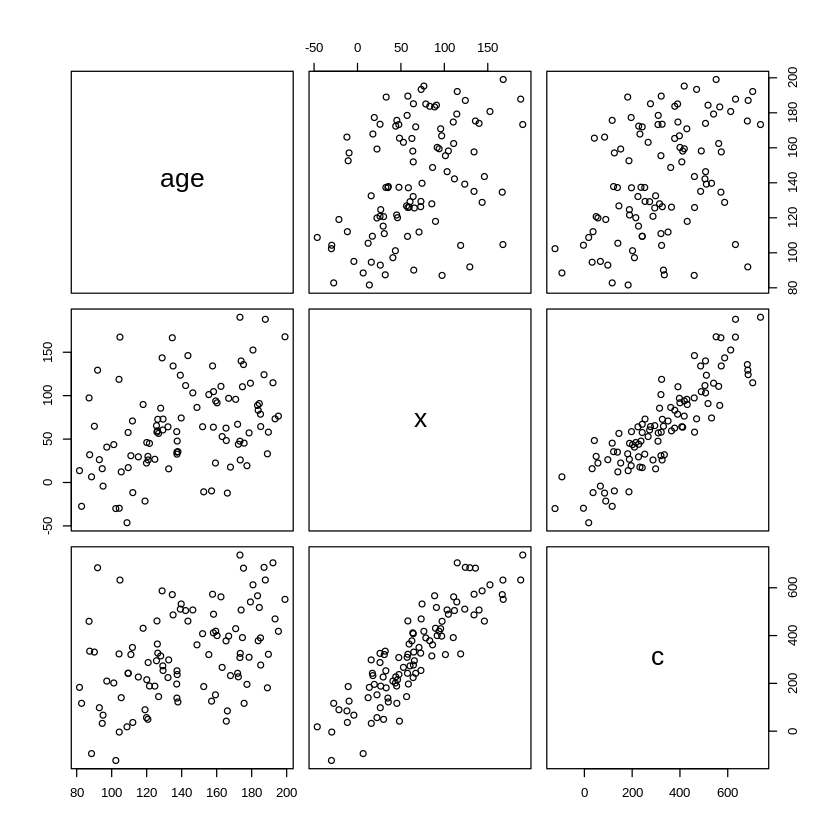

In [41]:
# WRITE YOUR CODE HERE
pairs(dat)


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [29]:
# WRITE YOUR CODE HERE
#install.packages("mediation")
library(mediation)


Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [42]:
# WRITE YOUR CODE HERE
fitM <- lm(x ~ age,     data=dat) #Step 1: IV on M, Age predicting x
fitY <- lm(c ~ x + age, data=dat) #Step 2: IV and M on DV, Number of passengers and weight predicting highway
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
summary(fitMed)



#also consider: is it a moderator?
#fitMod <- lm(x ~ age*x,data=dat)
#summary(fitMod)



Call:
lm(formula = x ~ age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.489 -28.111  -4.353  26.214 125.830 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.3777    21.4561  -1.136    0.259    
age           0.6301     0.1473   4.279 4.38e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.05 on 98 degrees of freedom
Multiple R-squared:  0.1574,	Adjusted R-squared:  0.1488 
F-statistic: 18.31 on 1 and 98 DF,  p-value: 4.378e-05



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-240.646  -61.820   -4.565   53.876  198.553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.3468    41.2061   0.809   0.4203    
x             3.1206     0.1927  16.192   <2e-16 ***
age           0.5940     0.3061   1.941   0.0552 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 89.78 on 97 degrees of freedom
Multiple R-squared:  0.7806,	Adjusted R-squared:  0.7761 
F-statistic: 172.6 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            1.99184      1.04074         3.07  <2e-16 ***
ADE             0.59057     -0.00791         1.19   0.056 .  
Total Effect    2.58242      1.45210         3.63  <2e-16 ***
Prop. Mediated  0.76966      0.53357         1.00  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

It looks like ACME is significant, suggesting that x is a strong mediator. ADE is close to significant (and also it is significant sometimes depending on the seed used for the data generated & when bootstrapping), so it seems that there may also be a direct effect of age as well, but I do notice that given this seed, age starts out as a significant predictor of x (the mediator), and when we include both the treat (age) and the mediator (x), it looks like age becomes insignificant (although very close to being statistically signficant, and again susceptible to the random seed used to generate the data given the relatively small sample size). I think the analysis yielded this result because we know our generated data for x (the mediator) is impacted by age, and that c is a linear combination of both x and age, so age should impact c through how it impacts x (and the mediation analysis correctly identifies this effect).

> *Write your response here*
>

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*